<a href="https://colab.research.google.com/github/renatocosta1/Projetos---Turing/blob/main/Projeto_Ingresso_NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Noções iniciais

O seguinte projeto, visando ao ingresso na área de NLP, busca concretizar as seguintes tarefas: 

1. Fazer pré-processamento do corpus
2. Fazer uma análise extensa do corpus
3. Criar um modelo que dada uma review, prevê sua polaridade (positivo se
a nota for maior que três e negativo se a nota for menor ou igual a
três).
4. Criação e análise de embeddings com base no corpus

Para tal, constituindo o pré-processamento com tokenização, remoção de stopwords e lematização (stemização), inicia-se este projeto com a tokenização, sendo esse um processo de separação de uma parte do texto em unidades menores, denominadas tokens.

Cabe destacar, contudo, antes serão feitas importações e instalações de programas e plataformas para ajudarem nessas tarefas, assim seguem-se tais programações.

In [1]:
pip install nltk

In [2]:
pip install -U spacy

     |████████████████████████████████| 6.0 MB 5.5 MB/s 
     |████████████████████████████████| 42 kB 1.2 MB/s 
     |████████████████████████████████| 451 kB 36.6 MB/s 
     |████████████████████████████████| 10.1 MB 45.1 MB/s 
     |████████████████████████████████| 181 kB 27.8 MB/s 
     |████████████████████████████████| 628 kB 32.7 MB/s 
  Attempting uninstall: catalogue
    Found existing installation: catalogue 1.0.0
    Uninstalling catalogue-1.0.0:
      Successfully uninstalled catalogue-1.0.0
  Attempting uninstall: srsly
    Found existing installation: srsly 1.0.5
    Uninstalling srsly-1.0.5:
      Successfully uninstalled srsly-1.0.5
  Attempting uninstall: thinc
    Found existing installation: thinc 7.4.0
    Uninstalling thinc-7.4.0:
      Successfully uninstalled thinc-7.4.0
  Attempting uninstall: spacy
    Found existing installation: spacy 2.2.4
    Uninstalling spacy-2.2.4:
      Successfully uninstalled spacy-2.2.4


In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')
nltk.download('stopwords')

import spacy

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [4]:
pip install -U spacy-lookups-data

     |████████████████████████████████| 98.5 MB 89 kB/s 


In [5]:
!python -m spacy download pt_core_news_lg

     |████████████████████████████████| 577.4 MB 5.8 kB/s 
✔ Download and installation successful
You can now load the package via spacy.load('pt_core_news_lg')


Ainda, os datasets são também aqui carregados e lidos, por isso sequenciados com os seguintes códigos. 

In [6]:
df_train = pd.read_csv('video_games_reviews_train.csv')
df_test = pd.read_csv('video_games_reviews_test.csv')
df_dev = pd.read_csv('video_games_reviews_dev.csv')

Dessa maneira, são iniciadas algumas percepções e leituras iniciais, nas quais, explicitando as descrições e informações de cada dataset.

In [7]:
df_train.head()

,level_0,index,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,9604,222941,A1U1AK7HKB2BLN,B00CX6XKK6,jayfer,"[4, 51]",ive got to play this on both consoles now and ...,1,wasted 500 dollars on the xbox one.,1385078400,"11 22, 2013"
1,5428,106670,A1L1D50VH2AX7J,B0017UFWMS,Anjoyla,"[0, 0]",This game gives you a series of word puzzles t...,2,Margots Word Brain,1321833600,"11 21, 2011"
2,198,24455,A2JWU211CM0BYE,B00005RCR0,DCN2049,"[0, 1]",You should pretty much already know what this ...,4,"Excellent product, watch the discs",1360540800,"02 11, 2013"
3,6070,42574,A1DP3YZ2OQWAP4,B0000ARQMW,liz,"[0, 0]",I really like this game i love all the challen...,5,Jammin banging game,1383436800,"11 3, 2013"
4,11616,172598,A48Z207T98FN0,B004HYK8Y8,The Reverend,"[296, 368]",*** please read the 12/9/11 update below this ...,1,Consumers are NOT Beta-Testers !!! (updated),1322784000,"12 2, 2011"


In [8]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   level_0         8000 non-null   int64 
 1   index           8000 non-null   int64 
 2   reviewerID      8000 non-null   object
 3   asin            8000 non-null   object
 4   reviewerName    7916 non-null   object
 5   helpful         8000 non-null   object
 6   reviewText      7999 non-null   object
 7   overall         8000 non-null   int64 
 8   summary         8000 non-null   object
 9   unixReviewTime  8000 non-null   int64 
 10  reviewTime      8000 non-null   object
dtypes: int64(4), object(7)
memory usage: 687.6+ KB


In [9]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   level_0         2500 non-null   int64 
 1   index           2500 non-null   int64 
 2   reviewerID      2500 non-null   object
 3   asin            2500 non-null   object
 4   reviewerName    2471 non-null   object
 5   helpful         2500 non-null   object
 6   reviewText      2499 non-null   object
 7   overall         2500 non-null   int64 
 8   summary         2500 non-null   object
 9   unixReviewTime  2500 non-null   int64 
 10  reviewTime      2500 non-null   object
dtypes: int64(4), object(7)
memory usage: 215.0+ KB


In [10]:
df_dev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   level_0         2000 non-null   int64 
 1   index           2000 non-null   int64 
 2   reviewerID      2000 non-null   object
 3   asin            2000 non-null   object
 4   reviewerName    1970 non-null   object
 5   helpful         2000 non-null   object
 6   reviewText      2000 non-null   object
 7   overall         2000 non-null   int64 
 8   summary         2000 non-null   object
 9   unixReviewTime  2000 non-null   int64 
 10  reviewTime      2000 non-null   object
dtypes: int64(4), object(7)
memory usage: 172.0+ KB


# Limpeza de Dados

Após as explicitações e visualizações superficiais anteriores, aponto aqui que a limpeza aqui focalizará mais no tratamento e eliminação de dados faltantes, porque, além de garantindo que não prejudicariam as análises, o foco deste projeto aborda questões de NLP, por isso a ênfase e o detalhamento será mais nisso consolidado, não na limpeza em si. 

Dessa forma, garantindo uma limpeza concisa e pontual, seguem-se os códigos.

In [14]:
df_train.dropna(inplace = True)

In [15]:
df_test.dropna(inplace = True)

In [16]:
df_dev.dropna(inplace = True)

Ainda, são retiradas as pontuações para não prejudicarem e facilitarem, também, os próximos procedimentos. Por isso, aplicam-se os seguintes códigos. 


# Pré-processamento

Nesta seção, enfim começaremos o pré-processamento com três atividades principais, como já comentado.

**Tokenização**

Iniciando com a Tokenização, resume-se que esse processo
consiste em uma forma de separar um pedaço de texto em unidades menores
chamadas tokens. Assim, os códigos seguintes aplicarão tais passos, além de que todas as palavras serão consolidadas e passadas para letra minúscula, garantindo mesmas interpretações. 


In [17]:
for i in df_train.index:
  df_train['reviewText'][i] = df_train['reviewText'][i].lower()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [18]:
for i in df_test.index:
  df_test['reviewText'][i] = df_test['reviewText'][i].lower()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [19]:
for i in df_dev.index:
  df_dev['reviewText'][i] = df_dev['reviewText'][i].lower()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [20]:
tokens = df_train['reviewText'].apply(word_tokenize) 

In [21]:
tokens = df_test['reviewText'].apply(word_tokenize) 

In [22]:
tokens = df_dev['reviewText'].apply(word_tokenize) 

Finalmente, são obtidos os tokens. 

In [23]:
tokens

0       [to, start, off, this, review, ,, let, me, tel...
1       [iron, man, 2, on, nintendo, wii, is, really, ...
2       [first, off, ,, this, game, is, very, addictin...
3       [this, is, seriously, the, best, simpsons, gam...
4       [blacksite, has, a, great, story, ,, a, very, ...
                              ...                        
1995    [if, you, like, any, mario, or, cartoonish, ad...
1996    [i, have, a, xbox, 360, ,, and, i, can, not, t...
1997    [first, of, all, i, purchased, this, game, aft...
1998    [i, 'm, just, coming, to, this, game, in, my, ...
1999    [graphics, are, decent, ,, they, look, like, r...
Name: reviewText, Length: 1970, dtype: object

**Remoção de Stopwords**

Depois, são codificadas nuances para a remoção de stopwords - palavras frequentes nas línguas, mas que normalmente não agregam muito na hora de analisar os textos. Sobre inglês, exemplificam-se como “the”, “is”, “at". 

In [24]:
stopwords = nltk.corpus.stopwords.words("english")

In [25]:
meaningful_words = [i for i in tokens if i not in stopwords]

In [26]:
words = []
for lista in meaningful_words: #lista oriunda do pré-processamento
  for p in lista:
    words.append(p)

In [27]:
sem_pontuação = [token for token in words if token.isalpha()]

In [28]:
sem_pontuação

['to',
 'start',
 'off',
 'this',
 'review',
 'let',
 'me',
 'tell',
 'you',
 'that',
 'i',
 'bought',
 'mortal',
 'kombat',
 'for',
 'the',
 'game',
 'boy',
 'before',
 'it',
 'had',
 'lousy',
 'ai',
 'good',
 'graphics',
 'bland',
 'music',
 'controls',
 'and',
 'difficulty',
 'modes',
 'novice',
 'warrior',
 'and',
 'master',
 'but',
 'it',
 'was',
 'good',
 'enough',
 'to',
 'get',
 'i',
 'found',
 'to',
 'be',
 'strange',
 'was',
 'that',
 'mortal',
 'kombat',
 'on',
 'the',
 'game',
 'boy',
 'had',
 'several',
 'similarities',
 'to',
 'the',
 'only',
 'differences',
 'are',
 'different',
 'characters',
 'and',
 'setting',
 'badder',
 'music',
 'and',
 'the',
 'controls',
 'a',
 'bit',
 'more',
 'unresponsive',
 'everything',
 'else',
 'seems',
 'to',
 'be',
 'the',
 'same',
 'it',
 'not',
 'like',
 'it',
 'a',
 'direct',
 'sequel',
 'is',
 'it',
 'i',
 'mean',
 'the',
 'megaman',
 'series',
 'always',
 'had',
 'the',
 'same',
 'gameplay',
 'sequel',
 'after',
 'sequel',
 'but',
 

**Stemização**
 
 Para esta, é importada uma específica biblioteca e as variáveis, assim como uma lista, são criadas e assim programas. Ainda, adciona-se aqui a preferência pela stemização, já que a lemmatização exige bem mais poder computacional e ainda é necessário que se guarde poder deste para a execução das próximas etapas.

 Para mais, a lista "depois_stem" criada será utilizada para outros aspectos relevantes do projeto. 



In [29]:
from nltk.stem import PorterStemmer

In [30]:
ps = PorterStemmer()

In [31]:
depois_stem = []
for z in sem_pontuação:
  depois_stem.append(ps.stem(z))

In [32]:
depois_stem

['to',
 'start',
 'off',
 'thi',
 'review',
 'let',
 'me',
 'tell',
 'you',
 'that',
 'i',
 'bought',
 'mortal',
 'kombat',
 'for',
 'the',
 'game',
 'boy',
 'befor',
 'it',
 'had',
 'lousi',
 'ai',
 'good',
 'graphic',
 'bland',
 'music',
 'control',
 'and',
 'difficulti',
 'mode',
 'novic',
 'warrior',
 'and',
 'master',
 'but',
 'it',
 'wa',
 'good',
 'enough',
 'to',
 'get',
 'i',
 'found',
 'to',
 'be',
 'strang',
 'wa',
 'that',
 'mortal',
 'kombat',
 'on',
 'the',
 'game',
 'boy',
 'had',
 'sever',
 'similar',
 'to',
 'the',
 'onli',
 'differ',
 'are',
 'differ',
 'charact',
 'and',
 'set',
 'badder',
 'music',
 'and',
 'the',
 'control',
 'a',
 'bit',
 'more',
 'unrespons',
 'everyth',
 'els',
 'seem',
 'to',
 'be',
 'the',
 'same',
 'it',
 'not',
 'like',
 'it',
 'a',
 'direct',
 'sequel',
 'is',
 'it',
 'i',
 'mean',
 'the',
 'megaman',
 'seri',
 'alway',
 'had',
 'the',
 'same',
 'gameplay',
 'sequel',
 'after',
 'sequel',
 'but',
 'i',
 'do',
 'recal',
 'mortal',
 'kombat',

# Análise do corpus

A seguir, são feitas algumas percepções e análises a partir de certas evidências e explorações, principalmente no df de treino, visto que é ele que será utilizado para treinar modelos de predição e aspectos de BOW, por exemplo. 

Para começar é possível verificar a frequência de termos, assim distribuídas:

In [33]:
frequency = nltk.FreqDist(depois_stem)
frequency.most_common()

[('the', 24595),
 ('to', 12172),
 ('and', 12152),
 ('a', 11287),
 ('it', 9097),
 ('i', 9021),
 ('game', 8972),
 ('of', 8903),
 ('you', 8585),
 ('is', 7978),
 ('thi', 5752),
 ('that', 5416),
 ('in', 5393),
 ('for', 4295),
 ('are', 3721),
 ('but', 3619),
 ('have', 3521),
 ('with', 3405),
 ('on', 2999),
 ('not', 2832),
 ('as', 2770),
 ('be', 2621),
 ('play', 2614),
 ('wa', 2603),
 ('like', 2226),
 ('do', 2079),
 ('can', 2054),
 ('or', 1979),
 ('get', 1978),
 ('your', 1976),
 ('all', 1914),
 ('if', 1914),
 ('they', 1906),
 ('just', 1889),
 ('so', 1864),
 ('there', 1826),
 ('one', 1816),
 ('my', 1706),
 ('at', 1699),
 ('time', 1501),
 ('more', 1462),
 ('from', 1450),
 ('up', 1390),
 ('out', 1361),
 ('will', 1306),
 ('some', 1232),
 ('realli', 1224),
 ('when', 1211),
 ('an', 1197),
 ('make', 1175),
 ('ha', 1168),
 ('good', 1161),
 ('veri', 1129),
 ('no', 1123),
 ('would', 1113),
 ('onli', 1102),
 ('other', 1045),
 ('even', 1044),
 ('about', 1043),
 ('me', 1036),
 ('go', 1019),
 ('what', 1010

Especificando sobre as frequências, contudo, exploro agora o corpus ainda pensando em suas frequências, mas permeando agora n-gramas, principalmente bigramas e trigramas após a stemmização. Para isso, são importados biliotecas para isso, além de listas geradas sobre e já apresentadas.

In [34]:
from nltk import bigrams
list(bigrams(depois_stem))

[('to', 'start'),
 ('start', 'off'),
 ('off', 'thi'),
 ('thi', 'review'),
 ('review', 'let'),
 ('let', 'me'),
 ('me', 'tell'),
 ('tell', 'you'),
 ('you', 'that'),
 ('that', 'i'),
 ('i', 'bought'),
 ('bought', 'mortal'),
 ('mortal', 'kombat'),
 ('kombat', 'for'),
 ('for', 'the'),
 ('the', 'game'),
 ('game', 'boy'),
 ('boy', 'befor'),
 ('befor', 'it'),
 ('it', 'had'),
 ('had', 'lousi'),
 ('lousi', 'ai'),
 ('ai', 'good'),
 ('good', 'graphic'),
 ('graphic', 'bland'),
 ('bland', 'music'),
 ('music', 'control'),
 ('control', 'and'),
 ('and', 'difficulti'),
 ('difficulti', 'mode'),
 ('mode', 'novic'),
 ('novic', 'warrior'),
 ('warrior', 'and'),
 ('and', 'master'),
 ('master', 'but'),
 ('but', 'it'),
 ('it', 'wa'),
 ('wa', 'good'),
 ('good', 'enough'),
 ('enough', 'to'),
 ('to', 'get'),
 ('get', 'i'),
 ('i', 'found'),
 ('found', 'to'),
 ('to', 'be'),
 ('be', 'strang'),
 ('strang', 'wa'),
 ('wa', 'that'),
 ('that', 'mortal'),
 ('mortal', 'kombat'),
 ('kombat', 'on'),
 ('on', 'the'),
 ('the', 'g

In [35]:
from nltk import trigrams
list(trigrams(depois_stem))

[('to', 'start', 'off'),
 ('start', 'off', 'thi'),
 ('off', 'thi', 'review'),
 ('thi', 'review', 'let'),
 ('review', 'let', 'me'),
 ('let', 'me', 'tell'),
 ('me', 'tell', 'you'),
 ('tell', 'you', 'that'),
 ('you', 'that', 'i'),
 ('that', 'i', 'bought'),
 ('i', 'bought', 'mortal'),
 ('bought', 'mortal', 'kombat'),
 ('mortal', 'kombat', 'for'),
 ('kombat', 'for', 'the'),
 ('for', 'the', 'game'),
 ('the', 'game', 'boy'),
 ('game', 'boy', 'befor'),
 ('boy', 'befor', 'it'),
 ('befor', 'it', 'had'),
 ('it', 'had', 'lousi'),
 ('had', 'lousi', 'ai'),
 ('lousi', 'ai', 'good'),
 ('ai', 'good', 'graphic'),
 ('good', 'graphic', 'bland'),
 ('graphic', 'bland', 'music'),
 ('bland', 'music', 'control'),
 ('music', 'control', 'and'),
 ('control', 'and', 'difficulti'),
 ('and', 'difficulti', 'mode'),
 ('difficulti', 'mode', 'novic'),
 ('mode', 'novic', 'warrior'),
 ('novic', 'warrior', 'and'),
 ('warrior', 'and', 'master'),
 ('and', 'master', 'but'),
 ('master', 'but', 'it'),
 ('but', 'it', 'wa'),
 ('i

Por fim, cabe aqui salientar o uso de *ngrams*, que dá a oportunidade de analisar agrupamento e frequência dos termos a depender da quantidade desejada de palavras. 

Pensando agora sobre o tamanho das análises, principiando o número de caracteres, começa-se criando uma coluna para isso no df, por isso os seguintes códigos são programados. 

In [36]:
df_train['text_size'] = np.nan
for i in df_train.index:
  df_train['text_size'][i] = len(df_train['reviewText'][i])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Depois, para cogitar comparações entre as colunas entre si, esboço o seguinte heatmap, percebendo que, na realidade, tal tamanho de caracter não será também tão explorado com outras variáveis, já que suas relações não são tão pertinentes. Entretanto, relacionando com *index*, consigo inferir a análise de que aparentemente as avalições foram ordenadas conforme o tamanho dos caracteres, visto que os maiores índices de relação estão entre tais variáveis.

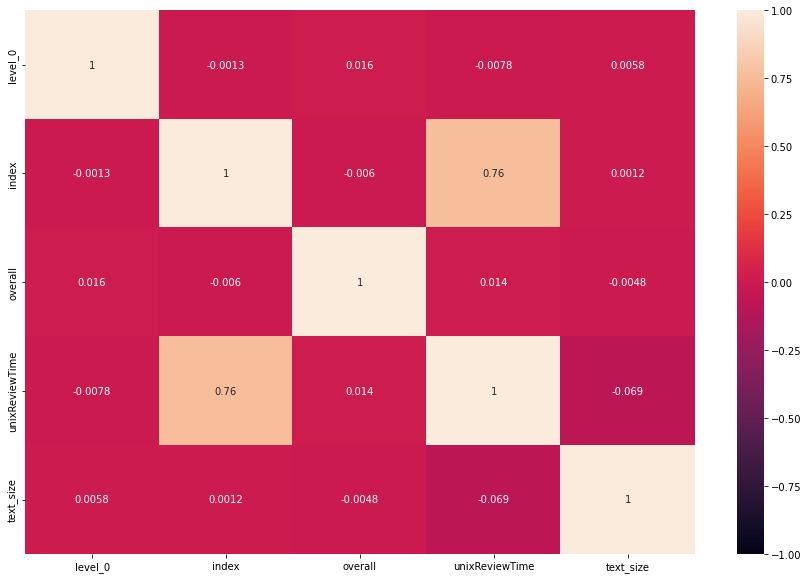

In [37]:
plt.figure(figsize=(15,10))
sns.heatmap(df_train.corr(), annot=True, vmin=-1, vmax=1)
plt.show()

Finalmente, finalizando tais análises, apresento o seguinte gráfico que ilustra a distribuição por tamanho dos textos: importante para notação de que a maioria das avaliações ficam entre 100 e 200 caracteres, embora existam outliers sobre, como também a contagem de valores abaixo ressalta. Os temas e refinamentos sobre as avaliações, contudo, serão mais explicitadas a partir das extrações. 

Visando a melhores entendimentos, todavia, também é plotado o seguinte boxplot que ilustra a constância de 100 a 200 caracteres pelos tamanhos das análises: informação também cogitada por se tratar de fragmentos avaliativos de videogames que, como esses próprios aparelhos ressoam a noção de velocidade, rapidez e dinamicade; corroboram curtos textos e avaliações. 

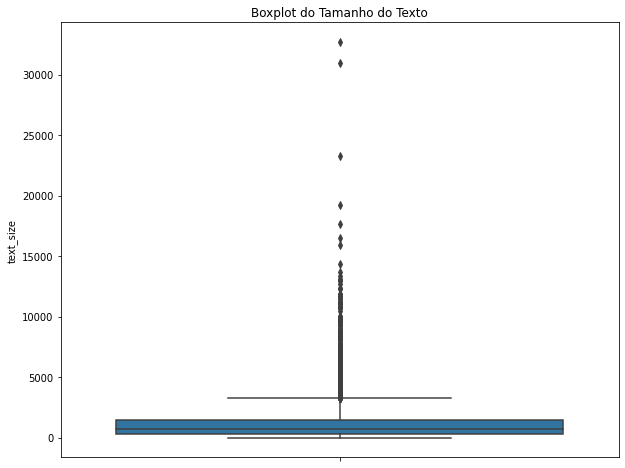

In [38]:
plt.figure(figsize=(10,8))
sns.boxplot(y=df_train["text_size"])
plt.title("Boxplot do Tamanho do Texto")
plt.show()

In [40]:
df_train["text_size"].value_counts()

137.0     21
147.0     20
213.0     20
115.0     19
125.0     19
          ..
5496.0     1
1892.0     1
2378.0     1
5014.0     1
1891.0     1
Name: text_size, Length: 2822, dtype: int64

Agora perpassando sobre entidades extraídas do texto, começo baixando e instalando programas relevantes para tal. 

In [41]:
!python -m spacy download en_core_web_sm

     |████████████████████████████████| 13.9 MB 5.2 MB/s 
  Attempting uninstall: en-core-web-sm
    Found existing installation: en-core-web-sm 2.2.5
    Uninstalling en-core-web-sm-2.2.5:
      Successfully uninstalled en-core-web-sm-2.2.5
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


E já crio uma lista para adicionar as entidades.

In [42]:
entidades = []

Além de uma função e instalações de bibliotecas e programas para tal. 

In [43]:
def NER(doc):
  if doc.ents:
    for w in doc.ents:
      print(w.text+' - '+str(w.start_char)+' - '+str(w.end_char)+ ' - '+w.label_+' - '+str(spacy.explain(w.label_)))
      if w.text not in entidades:
        entidades.append(w.text)
  else:
    print('Não foram encontradas entidades.')

In [44]:
!python -m spacy download en_core_web_sm

     |████████████████████████████████| 13.9 MB 5.0 MB/s 
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [45]:
nlp = spacy.load('en_core_web_sm')

Finalmente, a função é executada.

In [62]:
for i in df_train.index:
  doc = nlp(df_train['reviewText'][i])
  NER(doc)

A saída de streaming foi truncada nas últimas 5000 linhas.
13 - 8608 - 8610 - CARDINAL - Numerals that do not fall under another type
4 week - 185 - 191 - DATE - Absolute or relative dates or periods
4 week - 260 - 266 - DATE - Absolute or relative dates or periods
a 4 week - 509 - 517 - DATE - Absolute or relative dates or periods
5/8 inch - 814 - 822 - QUANTITY - Measurements, as of weight or distance
two - 862 - 865 - CARDINAL - Numerals that do not fall under another type
today - 927 - 932 - DATE - Absolute or relative dates or periods
two - 968 - 971 - CARDINAL - Numerals that do not fall under another type
2012 - 993 - 997 - CARDINAL - Numerals that do not fall under another type
2 - 1150 - 1151 - CARDINAL - Numerals that do not fall under another type
the 8 week - 1163 - 1173 - DATE - Absolute or relative dates or periods
two - 1233 - 1236 - CARDINAL - Numerals that do not fall under another type
first - 1265 - 1270 - ORDINAL - "first", "second", etc.
second - 1319 - 1325 - ORDI

Enfim, depois dessas longas execuções e finalizações das funções, consigo perceber que as extrações orbitam diferentes temáticas e parâmetros sobre as revisões, principalmente distribuídas como CARDINAL, QUANTITY, ORDINAL, TIME, ORG, PERSON, DATE, PERCENT e MONEY.

Assim, é possível analisar as vertentes de cada um, principiando as informações principais e mais valorizadas para cada avaliação dos videogames. Em CARDINAL, QUANTITY e ORDINAL, por exemplo, a sequência ou anterioridade do jogo, bem como medidas e avaliações numéricas sobre eles, respectivamente, são mais valorizadas e destacadas. Ou seja, a presença dos números de certa maneira ordenados não promovem a diferentes classificações do NER. 

Já descrevendo sobre TIME e ORG, percebe-se que a avaliações assim categorizadas - a partir da extração dada pelo NER pré-treinado - valorizam o quão recente o jogo e a avaliação constitui-se, além das organizações e agências envolvidas sobre elas.

Tratando das denominadas como PERSON e DATE, por suas vezes, a função de extração classifica a citação de pessoas, incluindo ficcionais, como relevantes para os jogos, enquanto que a noção de DATE enaltece relativos períodos como prioridades nos comentários dos jogos. 

Por fim, enquanto PERCENT paira, de maneira vaga, a presença de "%" sem especificar para que, em MONEY a simples de tais aspectos monetários já indicam que a essência da avalaição orbita tal eixo, embora realmente sejam extrações um pouco mais imprecisas e vagas comparando-se com as restantes.  

Finalmente, finalizando sobre essas extrações, apesar das ordens não terem sido respeitadas em relação ao df original, infere-se que a grosso modo é possível pensar em alguns parâmetros e noções de temáticas e vertentes das avaliações, porém, para diversidade de foco e extensão da análise, são a seguir configuradas observações de classes gramaticais e proporção de maiúsculas e minúsculas.  

Por isso, aqui se cria uma função para isso, assim esboçando os seguintes códigos.

In [51]:
def proporcao_letras(df_train):
  texto = "".join(df_train)
  letras = [i for i in texto if i.isalpha()]
  letras_maisculas = [i for i in letras if i.isupper()]
  return len(letras_maisculas)*100/len(letras)

In [53]:
df_train["polaridade"] = [1 if (x >= 3) else 0 for x in df_train["overall"]] 
#1 = positivo
#0 = negativo

In [54]:
porcentagem = [proporcao_letras(df_train["reviewText"]), proporcao_letras(df_train[df_train["polaridade"] == 0]["reviewText"]), proporcao_letras(df_train[df_train["polaridade"] == 1]["reviewText"])]
legendas = ["Análises", "Análises Negativas", "Análises positivas"]

Encerra-se, todavia, importando e baixando alguns módulos e recursos para a disposição de cada classe morfológica, pensando em suas presenças.

In [56]:
from nltk.tag import pos_tag
from nltk.tokenize import word_tokenize

In [60]:
df_train['str_review'] = df_train['reviewText'].str.lower() #em que se cria uma coluna toda unificada em string para aplicar no código seguinte

In [57]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [61]:
pos_tag(' '.join(df_train['str_review']).split())

[('ive', 'JJ'),
 ('got', 'VBD'),
 ('to', 'TO'),
 ('play', 'VB'),
 ('this', 'DT'),
 ('on', 'IN'),
 ('both', 'DT'),
 ('consoles', 'NNS'),
 ('now', 'RB'),
 ('and', 'CC'),
 ('can', 'MD'),
 ('honestly', 'RB'),
 ('say', 'VB'),
 ('it', 'PRP'),
 ('looks', 'VBZ'),
 ('100000x', 'CD'),
 ('better', 'NN'),
 ('on', 'IN'),
 ('the', 'DT'),
 ('ps4', 'NN'),
 ('maybe', 'RB'),
 ('the', 'DT'),
 ('xbox', 'NN'),
 ('one', 'CD'),
 ('i', 'NN'),
 ('have', 'VBP'),
 ('is', 'VBZ'),
 ('messed', 'VBN'),
 ('up', 'RP'),
 ('but', 'CC'),
 ('ps4', 'VB'),
 ('just', 'RB'),
 ('killed', 'VBN'),
 ('it', 'PRP'),
 ('this', 'DT'),
 ('game', 'NN'),
 ('gives', 'VBZ'),
 ('you', 'PRP'),
 ('a', 'DT'),
 ('series', 'NN'),
 ('of', 'IN'),
 ('word', 'NN'),
 ('puzzles', 'NNS'),
 ('to', 'TO'),
 ('figure', 'VB'),
 ('out', 'RP'),
 ('.', '.'),
 ('i', 'VB'),
 ('bought', 'VBD'),
 ('this', 'DT'),
 ('because', 'IN'),
 ('i', 'NN'),
 ('am', 'VBP'),
 ('a', 'DT'),
 ('fan', 'NN'),
 ('of', 'IN'),
 ('scrabble', 'JJ'),
 ('but', 'CC'),
 ('this', 'DT'),
 ('g

E, terminando esta parte concomitantemente que apontando a pluralidade de classes de palavras, depreende-se, também sintetizando as percepções oriundas do NER e dos outros parâmetros realizados, a diversidade de temática e pontos sobre as avaliações, principando diferentes video games e usuários das mais distintas idades e feições. 

# Modelagem e Feature Engineering

A seguir, enfim o texto começará a ser transformado para ser entendido pela computação. Para isso, sabe-se que este apenas lê e compreende números, não letras, e, portanto, os fragmentos serão vetorizados, inicialmente no singelo modelo de Bag of Words, para depois também ser aplicado a dois diferentes modelos de predição, os quais serão treinados e avaliados por suas métricas. 

Primeiramente, é importado o programa para execução de BOW e sua vetorização. 

In [65]:
from sklearn.feature_extraction.text import CountVectorizer

Ainda, é criada uma nova coluna no df_train, denominada "polaridade", que determina as avaliações positivas - quando com *overall* maior ou igual a 3 - e uma negativa, quando tal *overall* é menor que 3. 

In [66]:
df_train["polaridade"] = [1 if (x >= 3) else 0 for x in df_train["overall"]] 
#1 = positivo
#0 = negativo

O mesmo ocorre com o df_test, já que deste será originada a coluna para comparação e verificação das métricas dos modelos. 

In [73]:
df_test["polaridade"] = [1 if x >= 3 else 0 for x in df_test["overall"]]

A seguir, são padronizadas e categorizadas as colunas, que serão utilizadas, em letras minúsculas e como strings, afinal só assim poderão ser vetorizadas.  

In [71]:
df_train["reviewTextlower"]= df_train["reviewText"].str.lower()

In [69]:
df_test["reviewTextlower"]= df_test["reviewText"].str.lower()

Dessa maneira, já é possível vetorizar e consolidar o método BOW. 

In [70]:
BOWvectorizer = CountVectorizer()
#TFIDvectorizer = TfidfVectorizer() 

BOWtrain_vec = BOWvectorizer.fit_transform(df_train["reviewTextlower"])
BOWtest_vec = BOWvectorizer.transform(df_test["reviewTextlower"])

Em seguida, são iniciados os modelos de predição, mas elucido as variáveis alocadas: como as com X são normalmente features para bases de predição, inseri ambas vetorizações oriundas de BOW, mas distinguindo entre treino e teste, para depois consolidar a comparação de métricas. 

Já as de eixo y, coloquei ambas voltadas a polaridades, então verificando as labels que eu gostaria de prever a partir das vetorizações, já sendo o treinamento e consolidação pelo teste. 

In [74]:
X_train = BOWtrain_vec.toarray()

In [75]:
y_train = df_train["polaridade"]

In [76]:
X_test = BOWtest_vec.toarray()

In [77]:
y_test = df_test["polaridade"]

Ainda, importei o primeiro modelo a ser utilizado: Naive Bayes.

In [78]:
from sklearn.naive_bayes import GaussianNB

E já o treinei e apresentei sua acurácia (proveniente da importação de códigos para tal, junto com o outro modelo) a qual será discutida depois também do outro modelo. 

In [79]:
NB_colunas_teste = GaussianNB()
NB_colunas_teste.fit(X_train, y_train)
y_predict = NB_colunas_teste.predict(X_test)
print(y_predict)

[0 1 0 ... 1 0 1]


In [82]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [83]:
print(accuracy_score(y_test, y_predict))

0.5121457489878543


Outrossim, é criado o modelo embasado no KNN, no qual, após os códigos aqui executados, é plotado um gráfico para descobrir um dos melhores valores de K e este já é também utilizado, após a criação até de uma lista para tal verificação. 

In [84]:
k_range = range(1, 14)
scores = {}
scores_list = []
for k in k_range:
  KNN_colunas = KNeighborsClassifier(n_neighbors = k)
  KNN_colunas.fit(X_train, y_train)
  y_predict = KNN_colunas.predict(X_test)
  scores[k] = accuracy_score(y_test, y_predict)
  scores_list.append(accuracy_score(y_test, y_predict))

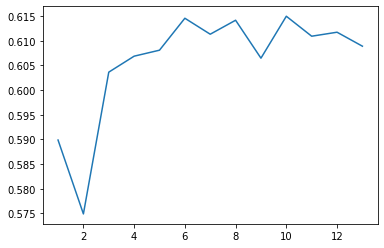

In [85]:
plt.figure #gráfico feito para identificar o melhor valor de K (único hiperparâmetro, que sempre precisa ser um número inteiro, de tal modelo)
plt.plot(k_range, scores_list)

Identificando um dos melhores valores de K como 10, por conseguinte, o modelo é criado com esse valor.

In [86]:
your_K = (10)
KNN_colunas = KNeighborsClassifier(n_neighbors = your_K)
KNN_colunas.fit(X_train, y_train)
y2_predict = KNN_colunas.predict(X_test)
print(y2_predict)

[1 1 1 ... 1 1 0]


E, finalmente, é ilustrada a acurácia em questão. 

In [88]:
print(accuracy_score(y_test, y2_predict))

0.6149797570850203


Terminando também esta etapa, comento por agora as métricas não tão elevadas, por serem modelos de predição mais rudimentares e não envolvidos com redes neurais. Sobre estas, então, já são introduzidas noções que acarretarão finalmente a parte 4 e final deste projeto: embeddings e Word2Vec.

# Embeddings (Word2Vec)

Já contextualizando tais conceitos envolvidos com redes neurais, enaltecem-se estas teorias, porque, depois de aplicar noções de BOW e perpassar sobre TF-IDF, percebe-se a ausêcia da análise do contexto entre as palavras analisadas. Portanto, são agora configurados embeddings, especificamente o Word2Vec. 

Antes de tais programações, contudo, ressoando a segunda palestra de Stanford University School of Engineering; ressalta-se que os significados linguísticos e embasados nos dicionários não foram tão significativos para programadores, porque, não focalizando signos linguístico, eles centralizaram-se mais em aspectos taxonômicos, como hiperônimos e sinônimos, como permeando WordNeT. 

No entanto, o seguinte programa também mostrou-se incompleto e, encerrando esse breve panorama sobre mais conceitos relevantes de NLP, Embeddings, com teores de distribuição proporcional, tornaram-se mais condizentes. Dessa forma, feita essa valorização teórica, inicia-se a instalação do *gensim*, e novamente do *nltk*, para início de aplicação.


In [89]:
pip install gensim

In [90]:
pip install nltk

Também, importam-se os modelos e programas para a leitura do texto pela máquina aqui objetivada.

In [91]:
from nltk.tokenize import sent_tokenize, word_tokenize
import gensim
from gensim.models import Word2Vec

Depois, o modelo já é treinado, simplesmente pela inseração e encaixe de uma tokenização, em lista, da coluna de *reviewText* do df_train, tipificada como string. 

In [92]:
 model1 = gensim.models.Word2Vec(df_train["reviewText"].astype(str).apply(word_tokenize).tolist(), min_count = 1, size = 100, window = 5, sg = 1) # skip gram(1)
 #model2 = gensim.models.Word2Vec(df_train["depois_stem"], min_count = 1,size = 100, window = 5, sg=0)  # CBOW(0)

Nota-se, ainda, o algoritmo anterior do modelo 1 numerado como 1, para garantir a aplicação de Word2Vec embasada em skip gram - como exigido - não em BOW. 

Verificando a execução e prosseguimento do modelo, a seguinte linha é programa para verificar realmente a existência de algumas palavras, como a selecionada *review*, no vocabulário criado: concretizando o funcionamento do modelo. 

In [93]:
review = model1['review']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


Por fim, são avaliados os embeddings modelados a partir de analogias e similaridades, abaixo sequenciados. 

In [94]:
print(model1.wv.most_similar(positive=["review", "good"], negative=["bad"]))

[('thoughts', 0.6719698905944824), ('solely', 0.671578049659729), ('5-star', 0.6712789535522461), ('reviews', 0.6653620004653931), ('suggestion', 0.6522669792175293), ('biased', 0.64885413646698), ('gamespot', 0.6424146890640259), ('basing', 0.6419026255607605), ('reviewing', 0.6392776370048523), ('impressions', 0.6386439204216003)]


Em que é possível verificar valorável dimensão do modelo por avaliações positivas, análogas com as palavras "review" e "good", possuírem mais similaridades com palavras assim categorizadas, como "5-star" e "solely", ressoando noções de boas avaliações e unicidades - que também trazem noções positivas. 

In [95]:
print(model1.wv.most_similar(positive=["fantasy", "magic"], negative=["real"]))

[('warrior', 0.6597232818603516), ('dragon', 0.6541081666946411), ('xi', 0.6393136978149414), ('tactics', 0.6275852918624878), ('axe', 0.6217306852340698), ('blade', 0.6155825853347778), ('hunter', 0.6117415428161621), ('siege', 0.6112761497497559), ('lord', 0.6081833243370056), ('vii', 0.6075060367584229)]


Ainda, avaliando em outras dimensões, cogita-se a abrangência do modelo, porque até pensando em diferentes tipos de jogo, como centralizando similaridades entre jogos fantasiosos e com caráter mágico, aproximam-se termos que recorrentemente apresentam essas nuances, como "espelho" e "dragão", na qual afastam-se de noções de "real" na medida em que promovem conceitos dúbios. 

#Conclusão 

Finalmente, este Projeto de Ingresso de Processamento de Linguagem Natural é finalizado, demonstrando, como já foi possível perceber pelas deduções mais aparentes e concretas nas etapas finais, um panorama sobre pré-processamento, uma análise do corpus, modelagens, feature engineering e embeddings: apesar de não tão plotada e ilustrada em gráficos, recorrentemente justificada e explorada por questões escritadas, privilegiando questões linguísticas e transformações desta comunicação humana para a percepção da máquina. 